In [1]:
from __future__ import print_function

import sys

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import sklearn


import random

# Что нужно знать про sklearn

Находится тут: http://scikit-learn.org

- Отличная документация (http://scikit-learn.org/stable/user_guide.html)
- Много примеров (http://scikit-learn.org/stable/auto_examples/index.html)
- Функции по работе с данными (sklearn.datasets)
- Функции по валидации и выбору модели (sklearn.model_selection)
- Реализованные алгоритмы обучения (sklearn.svm, sklearn.linear_model и т.д)


Каждый алгоритм обучения завернут в класс со следующими методами:
- fit(X, Y) - обучи алгоритм с выборкой (X, Y)
- score(X, Y) - посчитай loss-function на выборке (X,Y) (по умолчанию, accuracy)
- predict(X) - выдай ответы для выборки X (вызывать после fit)
- predict_proba(X) - выдай вероятности по классам для выборки X (вызывать после fit)

## MNIST
![MNIST performance](ml_mnist_table.png)

In [2]:
import sklearn.datasets

In [3]:
mnist = sklearn.datasets.fetch_mldata('MNIST original')
X, Y = mnist['data'], np.array(mnist['target'], dtype='int')

ntrain_dev = 60000
X_train_dev, Y_train_dev = X[:ntrain_dev], Y[:ntrain_dev]
X_test, Y_test = X[ntrain_dev:], Y[ntrain_dev:]

In [4]:
permutation = np.random.permutation(ntrain_dev)
ntrain = ntrain_dev * 90 / 100
X_train, Y_train = X_train_dev[permutation][:ntrain], Y_train_dev[permutation][:ntrain]
X_dev, Y_dev = X_train_dev[permutation][ntrain:], Y_train_dev[permutation][ntrain:]

In [5]:
def filter_by_digits(x, y, digits, limit=None):
    indices = [i for i in xrange(len(x)) if y[i] in digits]
    limit = limit or len(indices)
    return x[indices][:limit], y[indices][:limit]

cool_digits = [0, 1, 2, 3, 4, 5]
x_train, y_train = filter_by_digits(X_train, Y_train, cool_digits, 3000)
x_dev, y_dev = filter_by_digits(X_dev, Y_dev, cool_digits, 100)
x_test, y_test = filter_by_digits(X_test, Y_test, cool_digits, 100)

# Визуализация данных

In [6]:
def visualize(x, title=None):
    x = np.array(x, dtype='uint8').reshape((28,28))
    if title:
        plt.title(title)
    plt.imshow(x, cmap='gray')
    plt.show()

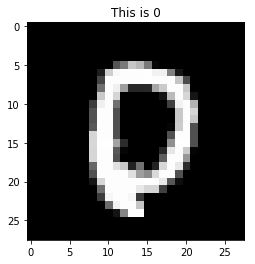

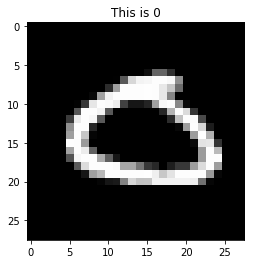

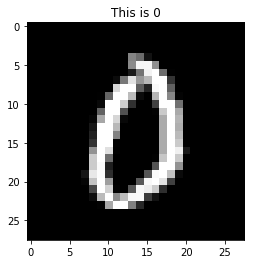

In [7]:
nvisualize = 3
for i in range(nvisualize):
    num = random.randint(0, len(x_train) - 1)
    visualize(x_train[num], title='This is {}'.format(y_train[num]))

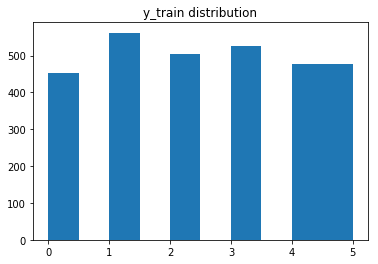

In [8]:
plt.hist(y_train)
plt.title('y_train distribution')
plt.show()

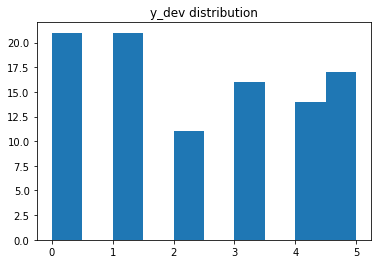

In [9]:
plt.hist(y_dev)
plt.title('y_dev distribution')
plt.show()

# Логистическая регрессия

In [10]:
import sklearn.linear_model
logistic_regression = sklearn.linear_model.LogisticRegression()

In [11]:
logistic_regression.fit(x_train, y_train)
print('Performance on train', logistic_regression.score(x_train, y_train))
print('Performance on dev', logistic_regression.score(x_dev, y_dev))

Performance on train 1.0
Performance on dev 0.89


# Наивный байесовский классификатор

In [12]:
import sklearn.naive_bayes
naive_bayes_estimators = [
    sklearn.naive_bayes.BernoulliNB, 
    sklearn.naive_bayes.GaussianNB, 
    sklearn.naive_bayes.MultinomialNB
]

In [13]:
for estimator_class in naive_bayes_estimators:
    print("Using", estimator_class)
    estimator = estimator_class()
    estimator.fit(X_train, Y_train)
    print("Train score {:.2f}".format(estimator.score(x_train, y_train)))
    print("Dev score {:.2f}".format(estimator.score(x_dev, y_dev)))

Using <class 'sklearn.naive_bayes.BernoulliNB'>
Train score 0.83
Dev score 0.86
Using <class 'sklearn.naive_bayes.GaussianNB'>
Train score 0.46
Dev score 0.49
Using <class 'sklearn.naive_bayes.MultinomialNB'>
Train score 0.81
Dev score 0.86


# Random forest

![ml_random_forest](ml_random_forest.png)

In [14]:
def plot_one_param(params, train_scores, dev_scores, title, param_name):
    plt.figure(figsize=(12, 12))
    plt.plot(params, train_scores, label='train accuracy')
    plt.plot(params, dev_scores, label='dev accuracy')
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

In [15]:
import sklearn.ensemble

def train_random_forest(n_estimators):
    train_scores = []
    dev_scores = []
    
    for estimators in n_estimators:
        clf = sklearn.ensemble.RandomForestClassifier(n_estimators=estimators,n_jobs=-1)
        clf.fit(X_train, Y_train)
        train_scores.append(clf.score(X_train, Y_train))
        dev_scores.append(clf.score(X_dev, Y_dev))
        
    plot_one_param(
        params=n_estimators,
        train_scores=train_scores,
        dev_scores=dev_scores,
        title='Random forest accuracy',
        param_name='number of trees'
    )

In [1]:
from __future__ import print_function

import sys

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import sklearn


import random

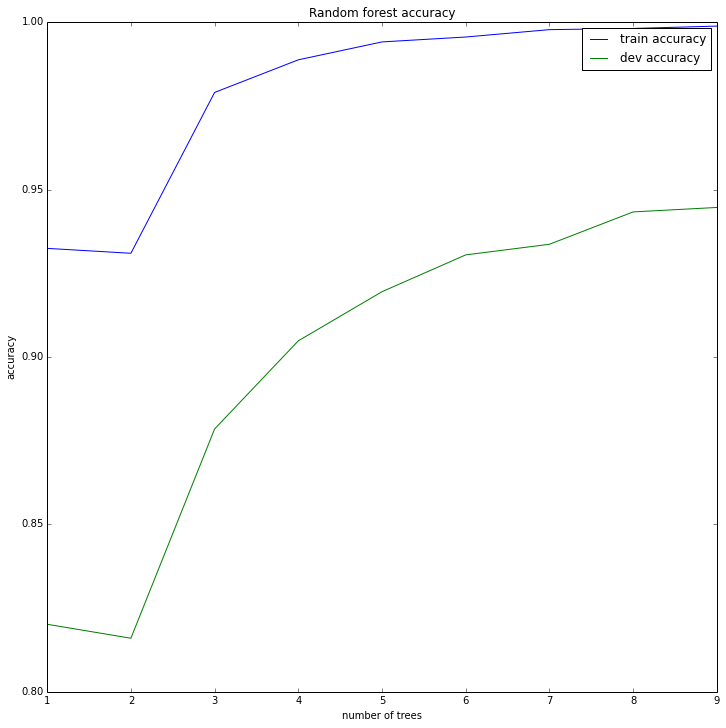

In [16]:
train_random_forest(range(1, 10))

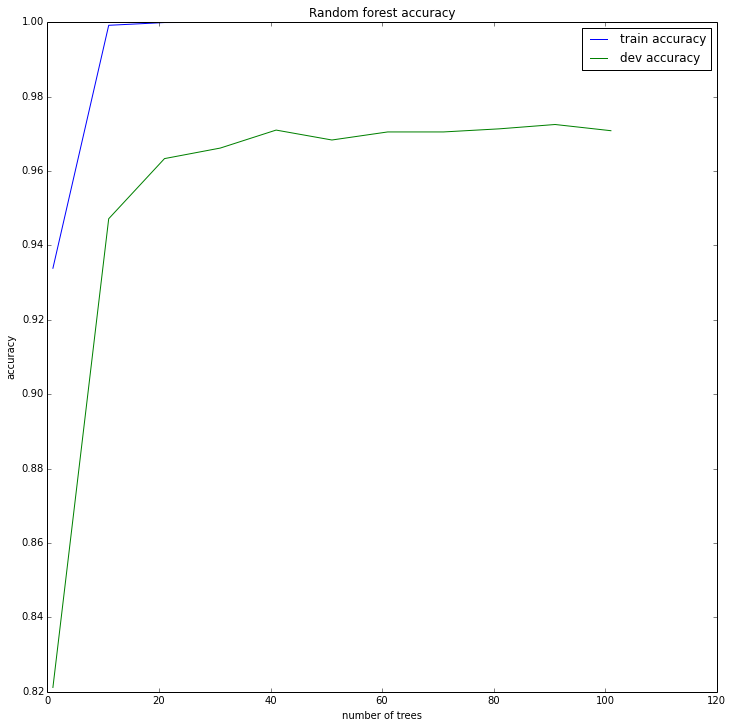

In [17]:
train_random_forest(range(1, 102, 10))

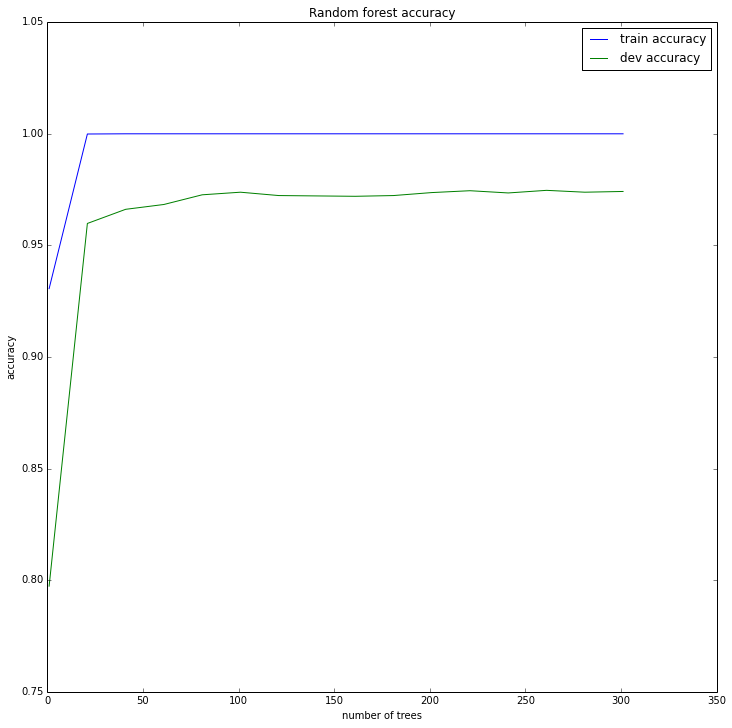

In [18]:
train_random_forest(range(1, 302, 20))

# SVM

In [19]:
import sklearn.svm

In [20]:
help(sklearn.svm.SVC)

Help on class SVC in module sklearn.svm.classes:

class SVC(sklearn.svm.base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to dataset with more than a couple of 10000 samples.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Penalty parameter C of the error term.
 |  
 |  kernel : string, optional (default='rbf')
 |       Specifies the kernel type to be used in the algorithm.
 |       It must be one of 'linear', 'poly

In [21]:
estimator = sklearn.svm.SVC()
estimator.fit(x_train, y_train)
print('SVC score on subtrain:', estimator.score(x_train, y_train))
print('SVC score on validation:', estimator.score(x_dev, y_dev))

SVC score on subtrain: 1.0
SVC score on validation: 0.22


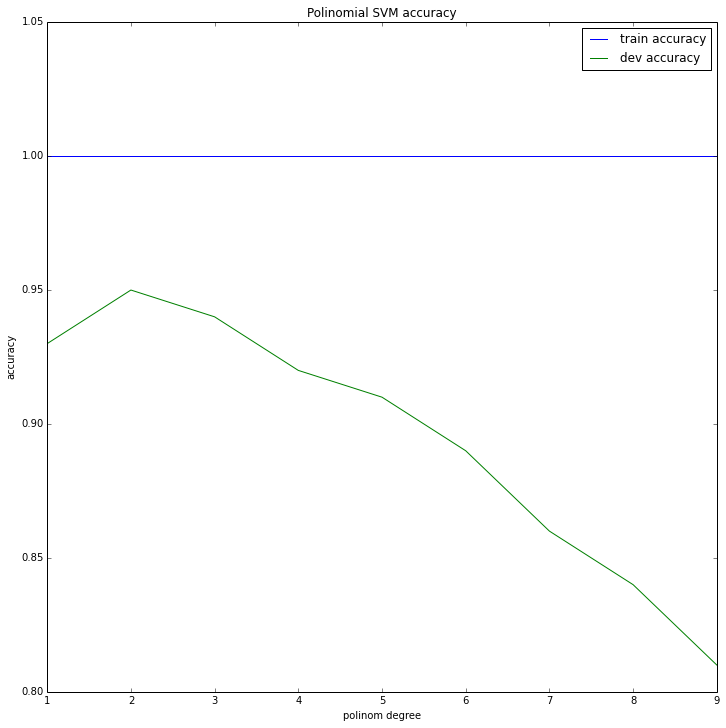

In [22]:
degrees = range(1, 10)
train_scores = []
dev_scores = []
for degree in degrees:
    estimator = sklearn.svm.SVC(kernel='poly', degree=degree)
    estimator.fit(x_train, y_train)
    train_scores.append(estimator.score(x_train, y_train))
    dev_scores.append(estimator.score(x_dev, y_dev))
    
plot_one_param(
    params=degrees, 
    train_scores=train_scores, 
    dev_scores=dev_scores, 
    title='Polinomial SVM accuracy', 
    param_name='polinom degree'
)

In [23]:
import sklearn.model_selection

tuned_parameters = [
    {
        'kernel': ['rbf'], 
        'gamma': [1e-3, 1e-4],
        'C': [0.01, 0.1, 1]
    },
    {
        'kernel': ['poly'], 
        'C': [0.1, 1, 100],
        'degree': [2, 3, 4]
    }
]

grid_search = sklearn.model_selection.GridSearchCV(
    sklearn.svm.SVC(),
    tuned_parameters,
    cv=5,
    n_jobs=32
)
grid_search.fit(x_train, y_train)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.186 (+/-0.001) for {'kernel': 'rbf', 'C': 0.01, 'gamma': 0.001}
0.186 (+/-0.001) for {'kernel': 'rbf', 'C': 0.01, 'gamma': 0.0001}
0.186 (+/-0.001) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.001}
0.186 (+/-0.001) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.0001}
0.186 (+/-0.001) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.186 (+/-0.001) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.0001}
0.965 (+/-0.004) for {'kernel': 'poly', 'C': 0.1, 'degree': 2}
0.956 (+/-0.012) for {'kernel': 'poly', 'C': 0.1, 'degree': 3}
0.941 (+/-0.021) for {'kernel': 'poly', 'C': 0.1, 'degree': 4}
0.965 (+/-0.004) for {'kernel': 'poly', 'C': 1, 'degree': 2}
0.956 (+/-0.012) for {'kernel': 'poly', 'C': 1, 'degree': 3}
0.941 (+/-0.021) for {'kernel': 'poly', 'C': 1, 'degree': 4}
0.965 (+/-0.004) for {'kernel': 'poly', 'C': 100, 'degree': 2}
0.956 (+/-0.012) for {'kernel': 'poly', 'C': 100, 'degree': 3}
0.941 (+/-0.021) for {'kernel': 'poly', 'C': 100, 'degree': 4}


In [24]:
help(sklearn.svm.LinearSVC)

Help on class LinearSVC in module sklearn.svm.classes:

class LinearSVC(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Linear Support Vector Classification.
 |  
 |  Similar to SVC with parameter kernel='linear', but implemented in terms of
 |  liblinear rather than libsvm, so it has more flexibility in the choice of
 |  penalties and loss functions and should scale better to large numbers of
 |  samples.
 |  
 |  This class supports both dense and sparse input and the multiclass support
 |  is handled according to a one-vs-the-rest scheme.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  penalty : string, 'l1' or 'l2' (default='l2')
 |      Specifies the norm used in the penalization. The 'l2'
 |      penalty is the standard used in SVC. The 'l1' leads to ``coef_``
 |      vectors that are sparse.
 |  
 |  loss : string, 'hinge' or 'squared_hinge' (defau

In [25]:
estimator = sklearn.svm.LinearSVC()
estimator.fit(X_train, Y_train)
print('SVC score on train:', estimator.score(X_train, Y_train))
print('SVC score on validation:', estimator.score(X_dev, Y_dev))

SVC score on train: 0.876611111111
SVC score on validation: 0.866833333333


# k-NN

In [26]:
import sklearn.neighbors

In [27]:
help(sklearn.neighbors.KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors.classification:

class KNeighborsClassifier(sklearn.neighbors.base.NeighborsBase, sklearn.neighbors.base.KNeighborsMixin, sklearn.neighbors.base.SupervisedIntegerMixin, sklearn.base.ClassifierMixin)
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, optional (default = 5)
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : str or callable, optional (default = 'uniform')
 |      weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a query point will have a
 |        greater influence than neighbors which are further away.
 |      - [ca

In [28]:
def train_knn_with_loo(k, weights, p): 
    train_scores = []
    dev_scores = []
    
    loo = sklearn.model_selection.LeaveOneOut()
    sum_accuracy = 0.
    old_percentage = 0
    for split, (train_indices, dev_indices) in enumerate(loo.split(x_train)):
        clf = sklearn.neighbors.KNeighborsClassifier(k, weights=weights, p=p)
        clf.fit(x_train[train_indices], y_train[train_indices])
        sum_accuracy += clf.score(x_train[dev_indices], y_train[dev_indices])
        
        percentage = int(100 * split / loo.get_n_splits(x_train))
        if old_percentage + 10 <= percentage:
            print('Done {}%'.format(percentage))
            old_percentage = percentage
    
    return sum_accuracy / loo.get_n_splits(x_train)


In [29]:
train_knn_with_loo(1, weights='uniform', p=2)

Done 10%
Done 20%
Done 30%
Done 40%
Done 50%
Done 60%
Done 70%
Done 80%
Done 90%


0.96799999999999997

# Использование нескольких моделей

- boosting (каждая следующая модель поправляет предыдущую)
- bagging (каждая модель работает над своим пространством признаков/объектов)

# Общая схема bagging
![bagging](ml_bagging.png)

# Общая схема blending
![blending](ml_blending.png)
# Общая схема stacking
![stacking](ml_stacking.png)

## Типичный график функции потерь
![plot](ml_typical_stacking.png)

# Цепочка классификаторов

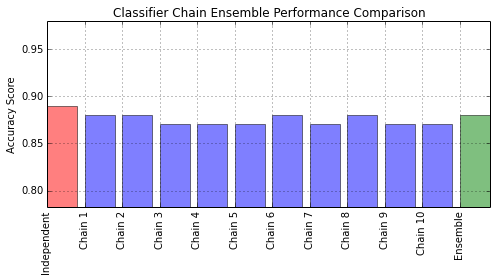

In [30]:
import sklearn.multioutput
import sklearn.multiclass
import sklearn.metrics

# Fit an independent logistic regression model for each class using the
# OneVsRestClassifier wrapper.
ovr = sklearn.multiclass.OneVsRestClassifier(sklearn.linear_model.LogisticRegression())
ovr.fit(x_train, y_train)
ovr_score = ovr.score(x_dev, y_dev)

nchains = 10
# Fit an ensemble of logistic regression classifier chains and take the
# take the average prediction of all the chains.
chains = [sklearn.multioutput.ClassifierChain(sklearn.linear_model.LogisticRegression(), order='random', random_state=i)
          for i in range(nchains)]
one_hot_targets = np.eye(len(cool_digits))[y_train]
for chain in chains:
    chain.fit(x_train, one_hot_targets)

    
Y_pred_chains = np.array([chain.predict(x_dev) for chain in chains])
chain_scores = [
    sklearn.metrics.accuracy_score(
        np.argmax(chain.predict(x_dev), axis=1),
        y_dev
    )
    for chain in chains
]

Y_pred_ensemble = Y_pred_chains.mean(axis=0)
ensemble_score = sklearn.metrics.accuracy_score(y_dev, np.argmax(Y_pred_ensemble, axis=1)) 


model_scores = [ovr_score] + chain_scores + [ensemble_score]

model_names = ('Independent',
               'Chain 1',
               'Chain 2',
               'Chain 3',
               'Chain 4',
               'Chain 5',
               'Chain 6',
               'Chain 7',
               'Chain 8',
               'Chain 9',
               'Chain 10',
               'Ensemble')

x_pos = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(7, 4))
ax.grid(True)
ax.set_title('Classifier Chain Ensemble Performance Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation='vertical')
ax.set_ylabel('Accuracy Score')
ax.set_ylim([min(model_scores) * .9, max(model_scores) * 1.1])
colors = ['r'] + ['b'] * nchains + ['g']
ax.bar(x_pos, model_scores, alpha=0.5, color=colors)
plt.tight_layout()
plt.show()